## Import das bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from neupy import algorithms, environment

import somoclu
%matplotlib inline  

from itertools import product
from neupy.algorithms.competitive.neighbours import find_neighbours_on_rect_grid
from examples.competitive.utils import plot_2d_grid

red, blue, black, gray = ('#E24A33', '#348ABD', '#000000', '#AAAAAA')

## Visualizando as classes

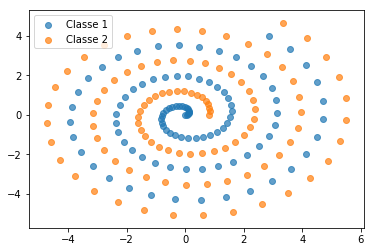

In [2]:
N = 20
i= np.arange(0,N,0.2)

x1 = (i/4)*np.cos(i)
y1 = (i/4)*np.sin(i)

x2 = ((i/4)+0.8)*np.cos(i)
y2 = ((i/4)+0.8)*np.sin(i)

plt.scatter(x1,y1,label='Classe 1',alpha='0.7')
plt.scatter(x2,y2,label='Classe 2',alpha='0.7')
plt.legend()
plt.show()

## Organizando os dados para treinamento 

- 51 pontos da classe 1
- 51 pontos da classe 2
- y_train possui então 102 pontos

In [7]:
x_train = np.zeros((200,2))

for i in range(0,100):
    x_train[i] = np.array([x1[i],y1[i]])
    
for i in range(100,200):
    x_train[i] = np.array([x2[i-100],y2[i-100]])
    
y_train = np.append(np.zeros(100),np.ones(100))

### Criando um grid para inicializar a SOM

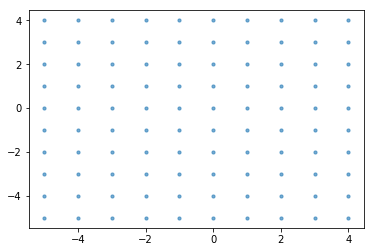

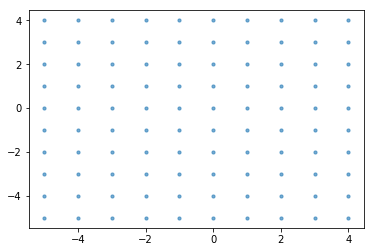

In [9]:
xg = np.array([])
yg = np.array([])
M,N = 10,10

for a in np.arange(-5,5,1):
    for b in np.arange(-5,5,1):
        #print(a,b)
        xg = np.append(xg,a)
        yg = np.append(yg,b)

plt.scatter(xg,yg,alpha='0.6',s=10)
plt.show()

#combinando os dados!

weights = np.zeros((M*N,2))

for i in range(0,M*N):
    weights[i] = np.array([xg[i],yg[i]])

plt.scatter(weights[:,0],weights[:,1],alpha='0.6',s=10)

## Implementando a rede SOM através do NeuPy


Main information

[ALGORITHM] SOFM

[OPTION] verbose = True
[OPTION] epoch_end_signal = None
[OPTION] show_epoch = 50
[OPTION] shuffle_data = True
[OPTION] step = 0.5
[OPTION] train_end_signal = None
[OPTION] n_inputs = 2
[OPTION] distance = euclid
[OPTION] features_grid = [10, 10]
[OPTION] grid_type = rect
[OPTION] learning_radius = 0
[OPTION] n_outputs = 100
[OPTION] reduce_radius_after = 100
[OPTION] reduce_std_after = 100
[OPTION] reduce_step_after = 100
[OPTION] std = 1
[OPTION] weight = init_pca


Start training

[TRAINING DATA] shapes: (200, 2)
[TRAINING] Total epochs: 500

---------------------------------------------------------
|    Epoch    |  Train err  |  Valid err  |    Time     |
---------------------------------------------------------
|           1 |     0.40022 |           - |       81 ms |
|          50 |     0.23503 |           - |       51 ms |
|         100 |      0.2275 |           - |       57 ms |
|         150 |     0.22054 |           - |       53 ms |
|    

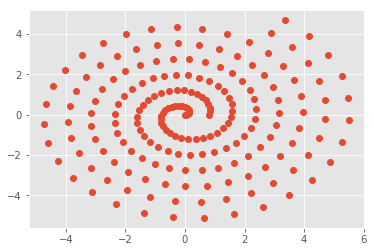

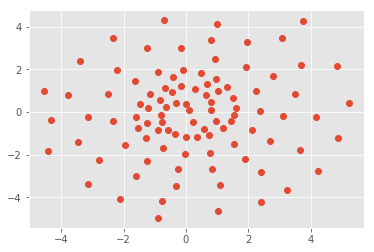

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from neupy import algorithms, environment


environment.reproducible()
plt.style.use('ggplot')


input_data = x_train

sofmnet = algorithms.SOFM(
    n_inputs=2,
    n_outputs=100,
    weight = 'init_pca',

    step=0.5,
    show_epoch=50,
    shuffle_data=True,
    verbose=True,

    learning_radius=0,
    features_grid=(10,10),
)

sofmnet.train(input_data, epochs=500)

print("> Start plotting")
#plt.xlim(-1, 1.2)
#plt.ylim(-1, 1.2)

plt.plot(input_data[:,0], input_data[:,1],'o')
plt.show()

plt.plot(sofmnet.weight[0], sofmnet.weight[1], 'o')
plt.show()

#for data in input_data:
#    print(sofmnet.predict(np.reshape(data, (2, 1)).T))

In [11]:
a = sofmnet.predict(input_data)
print(a)
len(input_data)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 1 0 0]]


200

# Usando o Somoclu para resolver o mesmo problema

In [41]:
input_data

array([[ 0.        ,  0.        ],
       [ 0.04900333,  0.00993347],
       [ 0.0921061 ,  0.03894183],
       [ 0.12380034,  0.08469637],
       [ 0.13934134,  0.14347122],
       [ 0.13507558,  0.21036775],
       [ 0.10870733,  0.27961173],
       [ 0.0594885 ,  0.34490741],
       [-0.01167981,  0.39982944],
       [-0.10224094,  0.43823143],
       [-0.20807342,  0.45464871],
       [-0.32367561,  0.44467302],
       [-0.44243623,  0.40527791],
       [-0.55697769,  0.33507589],
       [-0.65955564,  0.23449171],
       [-0.74249437,  0.10584001],
       [-0.79863582, -0.04669931],
       [-0.82177846, -0.21720994],
       [-0.80708257, -0.3982684 ],
       [-0.75141933, -0.581265  ],
       [-0.65364362, -0.7568025 ],
       [-0.51477386, -0.91515456],
       [-0.33806616, -1.04676228],
       [-0.12897541, -1.14274465],
       [ 0.10499878, -1.19539753],
       [ 0.35457773, -1.19865534],
       [ 0.60907167, -1.14849105],
       [ 0.85683538, -1.04323206],
       [ 1.08579223,

In [14]:
n_rows, n_columns = 50, 50
som = somoclu.Somoclu(n_columns, n_rows, data=input_data,initialization="pca" )
%time som.train()

CPU times: user 1.73 s, sys: 468 ms, total: 2.2 s
Wall time: 299 ms


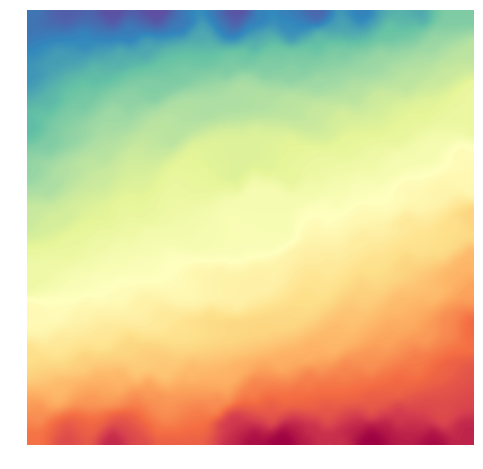

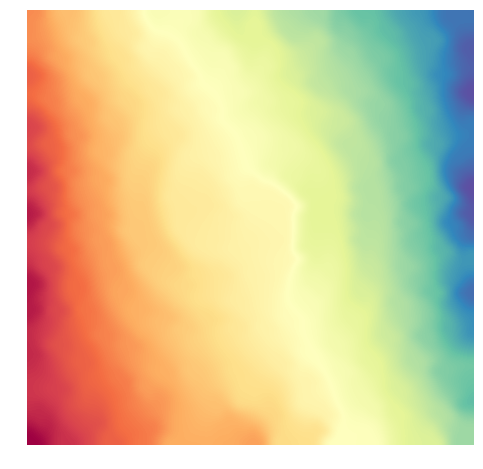

<module 'matplotlib.pyplot' from '/home/iagodiogenes/anaconda3/envs/tensorflow/lib/python3.6/site-packages/matplotlib/pyplot.py'>

In [15]:
colors = ["red"] * 100
colors.extend(["green"] * 100)
colors.extend(["blue"] * 100)
labels = range(200)
som.view_component_planes()

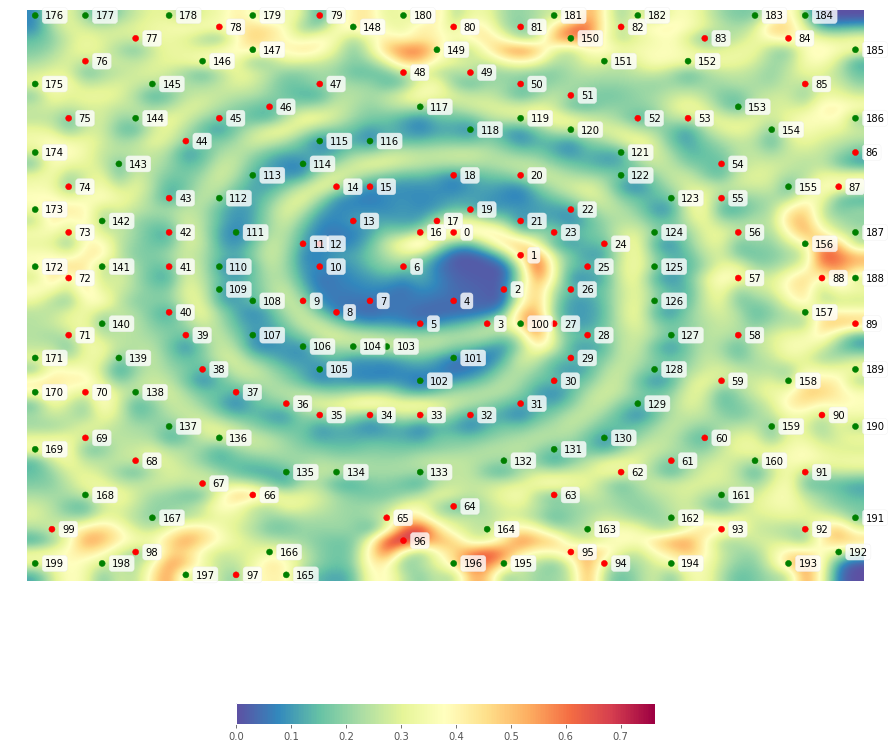

<module 'matplotlib.pyplot' from '/home/iagodiogenes/anaconda3/envs/tensorflow/lib/python3.6/site-packages/matplotlib/pyplot.py'>

In [17]:
som.view_umatrix(bestmatches=True, bestmatchcolors=colors, labels=labels,colorbar=True,figsize=((15,15)))

# Resolvendo o problema com uma rede LVQ


Main information

[ALGORITHM] LVQ3

[OPTION] verbose = True
[OPTION] epoch_end_signal = None
[OPTION] show_epoch = 20
[OPTION] shuffle_data = False
[OPTION] train_end_signal = None
[OPTION] minstep = 1e-05
[OPTION] n_classes = 2
[OPTION] n_inputs = 2
[OPTION] n_subclasses = 180
[OPTION] n_updates_to_stepdrop = 15000
[OPTION] prototypes_per_class = None
[OPTION] weight = None
[OPTION] epsilon = 0.1
[OPTION] slowdown_rate = 0.4
[OPTION] step = 0.001


Start training

[TRAINING DATA] shapes: (200, 2)
[TRAINING] Total epochs: 500

---------------------------------------------------------
|    Epoch    |  Train err  |  Valid err  |    Time     |
---------------------------------------------------------
|           1 |       0.035 |           - |       15 ms |
|          20 |        0.03 |           - |       12 ms |
|          40 |        0.03 |           - |       12 ms |
|          60 |        0.03 |           - |       12 ms |
|          80 |        0.03 |           - |       13 ms |
| 

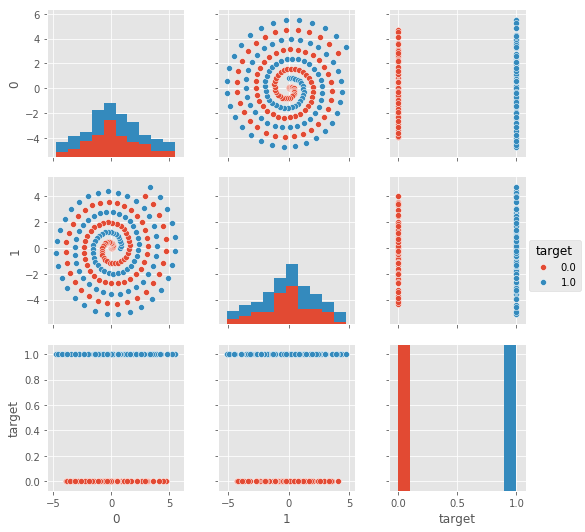

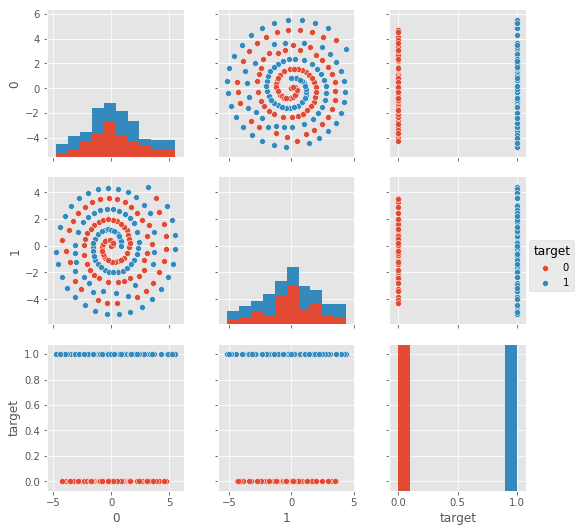

In [39]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from neupy import algorithms, environment


environment.reproducible()

def plot_scattermatrix(data, target):
    df = pd.DataFrame(data)
    df['target'] = target
    return sns.pairplot(df, hue='target')


if __name__ == '__main__':
    #dataset = datasets.load_iris()
    #data, target = dataset.data, dataset.target
    data = input_data 
    target = np.append(np.zeros(100),np.ones(100))

    lvqnet = algorithms.LVQ3(
        # number of features
        n_inputs=2,

        # number of data points that we want
        # to have at the end
        n_subclasses=180,

        # number of classes
        n_classes=2,

        verbose=True,
        show_epoch=20,

        step=0.001,
        n_updates_to_stepdrop=150 * 100,
    )
    lvqnet.train(data, target, epochs=500)

    plot_scattermatrix(data, target)
    plot_scattermatrix(data=lvqnet.weight, target=lvqnet.subclass_to_class)
    plt.show()


Main information

[ALGORITHM] LVQ3

[OPTION] verbose = True
[OPTION] epoch_end_signal = None
[OPTION] show_epoch = 20
[OPTION] shuffle_data = False
[OPTION] train_end_signal = None
[OPTION] minstep = 1e-05
[OPTION] n_classes = 3
[OPTION] n_inputs = 4
[OPTION] n_subclasses = 30
[OPTION] n_updates_to_stepdrop = 15000
[OPTION] prototypes_per_class = None
[OPTION] weight = None
[OPTION] epsilon = 0.1
[OPTION] slowdown_rate = 0.4
[OPTION] step = 0.001


Start training

[TRAINING DATA] shapes: (150, 4)
[TRAINING] Total epochs: 100

---------------------------------------------------------
|    Epoch    |  Train err  |  Valid err  |    Time     |
---------------------------------------------------------
|           1 |    0.033333 |           - |       12 ms |
|          20 |    0.033333 |           - |        8 ms |
|          40 |    0.033333 |           - |        7 ms |
|          60 |    0.033333 |           - |        7 ms |
|          80 |    0.026667 |           - |        8 ms |
|  

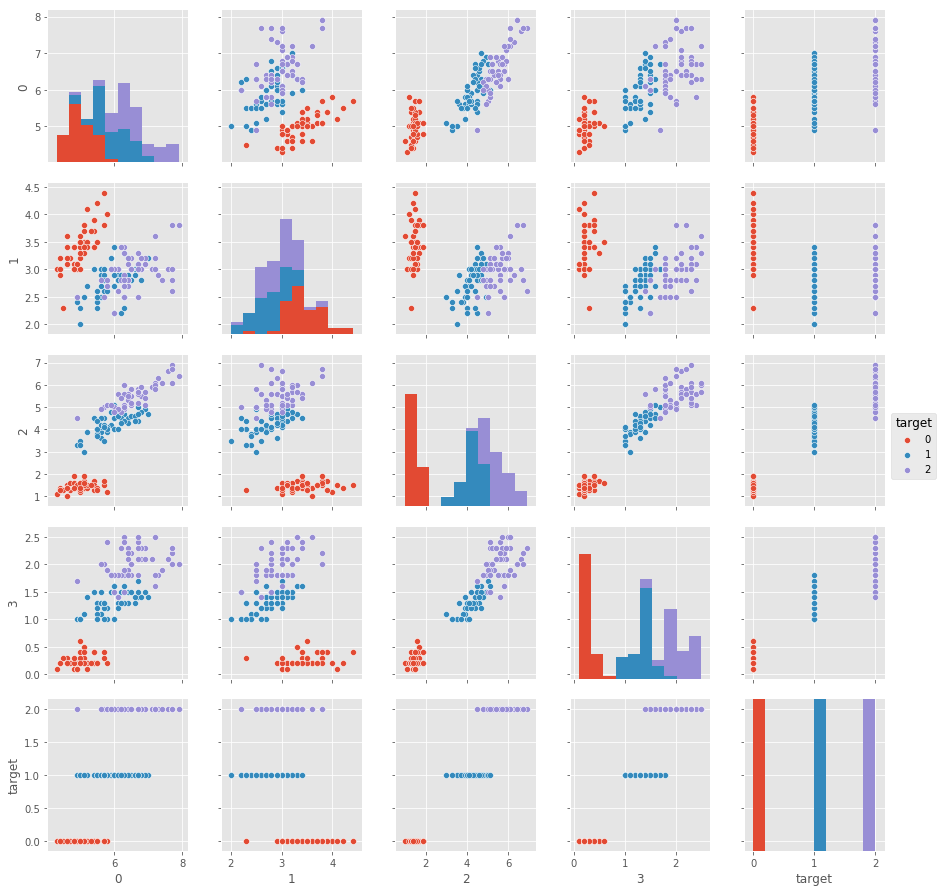

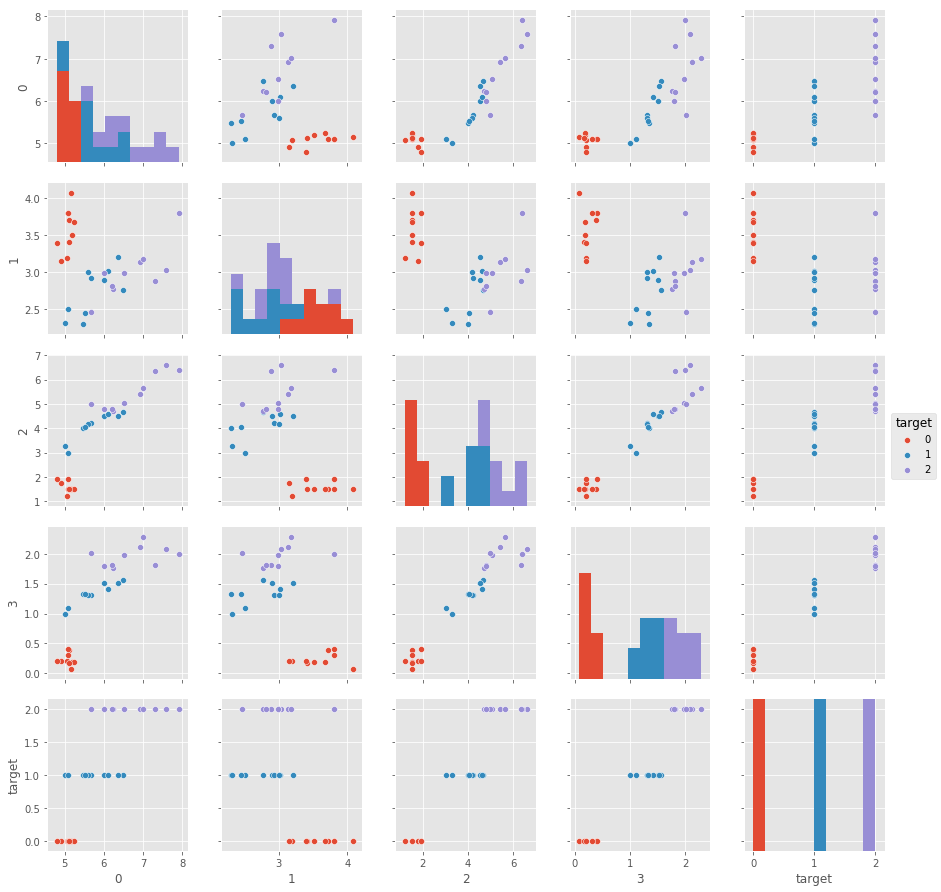

In [40]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from neupy import algorithms, environment


environment.reproducible()


def plot_scattermatrix(data, target):
    df = pd.DataFrame(data)
    df['target'] = target
    return sns.pairplot(df, hue='target')


if __name__ == '__main__':
    dataset = datasets.load_iris()
    data, target = dataset.data, dataset.target

    lvqnet = algorithms.LVQ3(
        # number of features
        n_inputs=4,

        # number of data points that we want
        # to have at the end
        n_subclasses=30,

        # number of classes
        n_classes=3,

        verbose=True,
        show_epoch=20,

        step=0.001,
        n_updates_to_stepdrop=150 * 100,
    )
    lvqnet.train(data, target, epochs=100)

    plot_scattermatrix(data, target)
    plot_scattermatrix(data=lvqnet.weight, target=lvqnet.subclass_to_class)
    plt.show()